## Diabetes Prediction Using Decision Tree Regressor

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
# Independent and Dependent Features
X=pd.DataFrame(diabetes['data'],columns=diabetes.feature_names)
Y=diabetes['target']

In [8]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [10]:
# Train_test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [11]:
# Viewing and mapping correaltion
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

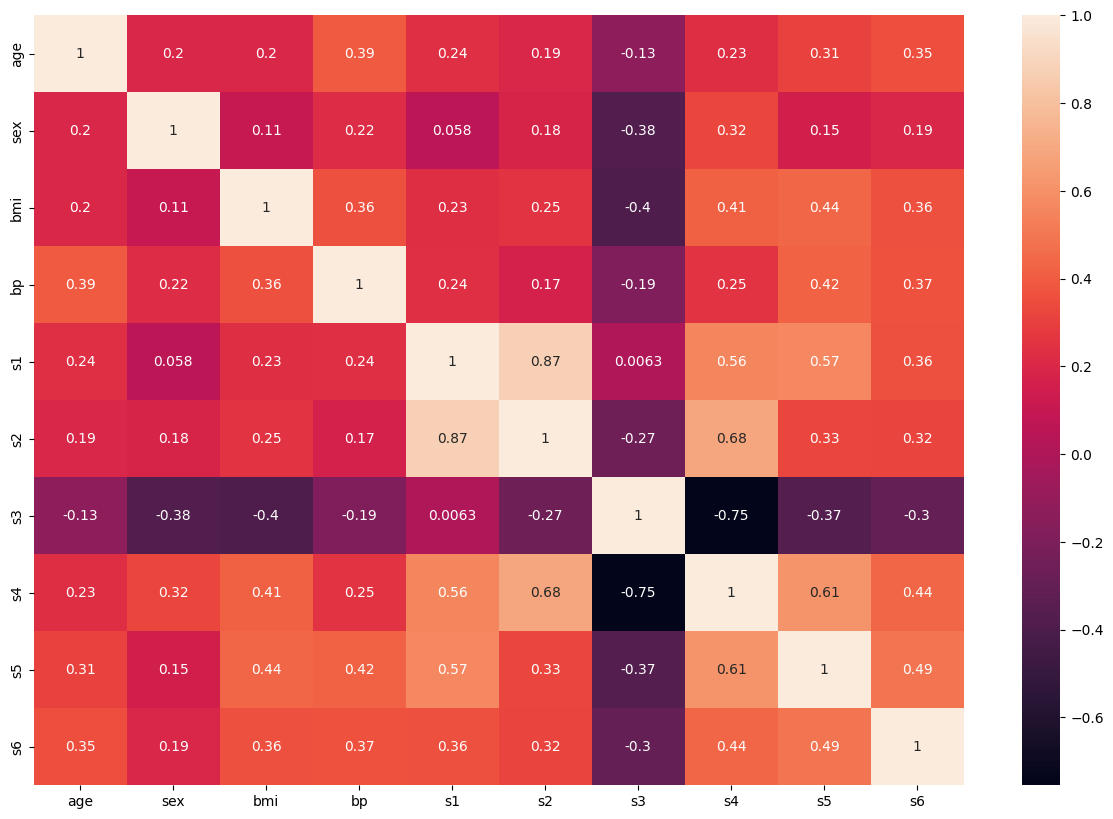

In [14]:
# Visualizing Correlation
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [15]:
from sklearn.tree import DecisionTreeRegressor
treeregressor=DecisionTreeRegressor()
treeregressor.fit(X_train,Y_train)

DecisionTreeRegressor()

### Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter':['best', 'random'],
            'max_depth':[1,2,3,4,5,10,15,20,25],
            'max_features':['auto', 'sqrt', 'log2']}
decision_grid=GridSearchCV(estimator=treeregressor,param_grid=param_grid,cv=5,scoring="neg_mean_squared_error")
decision_grid.fit(X_train,Y_train)

d:\Github Repos\AI-ML-Work\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Github Repos\AI-ML-Work\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Github Repos\AI-ML-Work\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\Github Repos\AI-ML-Work\venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "d:\Github R

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [17]:
decision_grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [19]:
## predictions
y_pred=decision_grid.predict(X_test)

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(Y_test,y_pred))
print(mean_absolute_error(Y_test,y_pred))
print(mean_squared_error(Y_test,y_pred))

0.10857497652226955
62.62162464391304
5640.644354447196


In [22]:
# Visualizing Decision Tree
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=5,max_features='sqrt',splitter='random')
selectedmodel.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='sqrt', splitter='random')

[Text(0.5681818181818182, 0.9166666666666666, 'x[7] <= 0.12\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.3181818181818182, 0.75, 'x[6] <= -0.101\nfriedman_mse = 5619.175\nsamples = 304\nvalue = 151.352'),
 Text(0.44318181818181823, 0.8333333333333333, 'True  '),
 Text(0.2727272727272727, 0.5833333333333334, 'friedman_mse = 0.0\nsamples = 1\nvalue = 341.0'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[3] <= -0.017\nfriedman_mse = 5518.628\nsamples = 303\nvalue = 150.726'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[7] <= -0.056\nfriedman_mse = 3647.157\nsamples = 119\nvalue = 120.479'),
 Text(0.09090909090909091, 0.25, 'x[3] <= -0.066\nfriedman_mse = 851.168\nsamples = 14\nvalue = 83.214'),
 Text(0.045454545454545456, 0.08333333333333333, 'friedman_mse = 0.25\nsamples = 2\nvalue = 59.5'),
 Text(0.13636363636363635, 0.08333333333333333, 'friedman_mse = 883.639\nsamples = 12\nvalue = 87.167'),
 Text(0.2727272727272727, 0.25, 'x[5] <= -0.024\nfriedman_ms

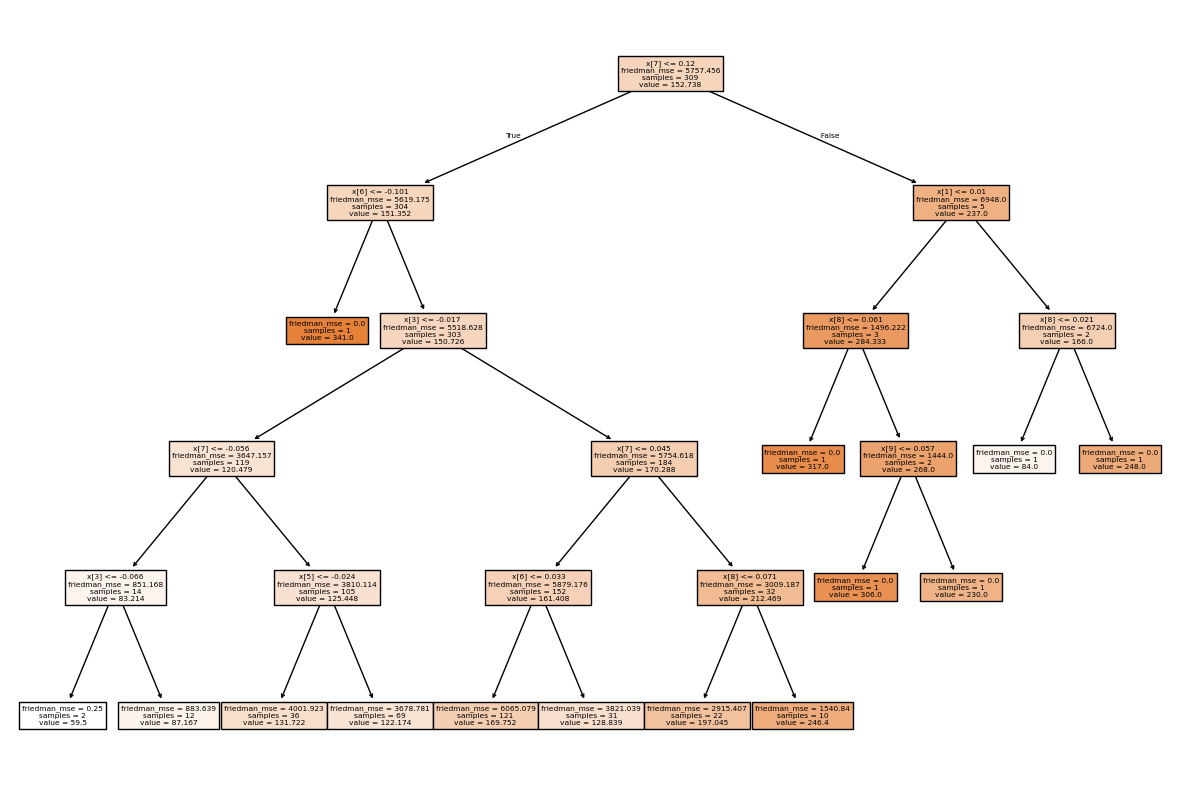

In [24]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)